In [1]:
import pandas as pd
pd.set_option('max_colwidth', 100)
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
import scipy.stats as st

In [ ]:
# Data - ABCD
# reporter - parent
# Hypothesis - Hyp1 (depressed vs not depressed)
# Target AUCROC = 0.8

In [ ]:
path_to_ksads_data = '/data/ABCD_MBDU/release3-tabulated-data/abcd_ksad01.txt' # this is the parent-report K-SADS we are comparing against
path_to_cbcl_data = '/data/ABCD_MBDU/release3-tabulated-data/abcd_cbcls01.txt'

# Loading ksads baseline data

In [ ]:
# Load baseline data, leave only the columns with the relevant diagnoses

In [2]:
ksads_data = pd.read_csv(path_to_ksads_data, sep='\t', header=0, low_memory=False)
ksads_data.head()

,collection_id,abcd_ksad01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,ksads_import_id_p,...,ksads_25_316_p,ksads_25_317_p,ksads_25_32_p,ksads_25_33_p,ksads_25_318_p,ksads_25_319_p,ksads_timestamp_p,ksads_duration_p,collection_title,study_cohort_name
0,collection_id,abcd_ksad01_id,dataset_id,The NDAR Global Unique Identifier (GUID) for research subject,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampling/imaging/biospecimen was completed. MM/DD/YYYY,Age in months at the time of the interview/test/sampling/imaging.,Sex of the subject,The event name for which the data was collected,Unique ID provided by KSADS for dataset,...,Symptom - Impairment in functioning due to selective mutism Present,Symptom - Impairment in functioning due to selective mutism Past,Symptom - Failure to speak in social situations Present,Symptom - Failure to speak in social situations Past,Symptom - Duration at least month for selective mutism Present,Symptom - Duration at least month for selective mutism Past,Starting timestamp for the survey,Time duration for the survey,collection_title,study_cohort_name
1,2573,160449,34613,NDAR_INV003RTV85,NDAR_INV003RTV85,09/16/2019,143,F,1_year_follow_up_y_arm_1,NDAR_INV003RTV85_1yearfollowupyarm1_01,...,555,555,555,555,555,555,02-14-2019 01:49,308090,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
2,2573,160452,34613,NDAR_INV005V6D2C,NDAR_INV005V6D2C,04/22/2018,121,F,baseline_year_1_arm_1,NDAR_INV005V6D2C_baselineyear1arm1_01,...,555,555,555,555,555,555,04-22-2018 04:33,492,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
3,2573,160491,34613,NDAR_INV019DXLU4,NDAR_INV019DXLU4,03/20/2017,132,F,baseline_year_1_arm_1,555,...,555,555,555,555,555,555,03-20-2017 01:00,719,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
4,2573,160461,34613,NDAR_INV00HEV6HB,NDAR_INV00HEV6HB,07/08/2017,124,M,baseline_year_1_arm_1,555,...,555,555,555,555,555,555,07-08-2017 11:00,44,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


In [3]:
long_names = ksads_data.loc[0].to_dict()
ksads_data = ksads_data.drop(0)

ksads_data_bsl = ksads_data.loc[ksads_data.eventname == 'baseline_year_1_arm_1'].copy()
#bsl_dat = ksads_dat.loc[ksads_dat.eventname == '2_year_follow_up_y_arm_1'].copy()
ksads_data_bsl.head()

,collection_id,abcd_ksad01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,ksads_import_id_p,...,ksads_25_316_p,ksads_25_317_p,ksads_25_32_p,ksads_25_33_p,ksads_25_318_p,ksads_25_319_p,ksads_timestamp_p,ksads_duration_p,collection_title,study_cohort_name
2,2573,160452,34613,NDAR_INV005V6D2C,NDAR_INV005V6D2C,04/22/2018,121,F,baseline_year_1_arm_1,NDAR_INV005V6D2C_baselineyear1arm1_01,...,555,555,555,555,555,555,04-22-2018 04:33,492,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
3,2573,160491,34613,NDAR_INV019DXLU4,NDAR_INV019DXLU4,03/20/2017,132,F,baseline_year_1_arm_1,555,...,555,555,555,555,555,555,03-20-2017 01:00,719,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
4,2573,160461,34613,NDAR_INV00HEV6HB,NDAR_INV00HEV6HB,07/08/2017,124,M,baseline_year_1_arm_1,555,...,555,555,555,555,555,555,07-08-2017 11:00,44,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
5,2573,160463,34613,NDAR_INV00J52GPG,NDAR_INV00J52GPG,09/05/2018,110,M,baseline_year_1_arm_1,NDAR_INV00J52GPG_baselineyear1arm1_01,...,555,555,555,555,555,555,09-05-2018 03:45,56,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
9,2573,160501,34613,NDAR_INV01EN91PG,NDAR_INV01EN91PG,04/19/2017,113,F,baseline_year_1_arm_1,555,...,555,555,555,555,555,555,04-19-2017 02:39,30,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


## ksads - only leave columns with name id and depression diagnosis

In [4]:
depression_column_list = [f'ksads_1_{x}_p' for x in [840, 841, 843, 844, 846]]
col_list = ['src_subject_id']
col_list += depression_column_list

col_list

['src_subject_id',
 'ksads_1_840_p',
 'ksads_1_841_p',
 'ksads_1_843_p',
 'ksads_1_844_p',
 'ksads_1_846_p']

In [5]:
ksads_bsl_id_alldep = ksads_data_bsl.loc[:, col_list]
ksads_bsl_id_alldep.head()

,src_subject_id,ksads_1_840_p,ksads_1_841_p,ksads_1_843_p,ksads_1_844_p,ksads_1_846_p
2,NDAR_INV005V6D2C,0,0,0,0,0
3,NDAR_INV019DXLU4,0,0,0,0,0
4,NDAR_INV00HEV6HB,0,0,0,0,0
5,NDAR_INV00J52GPG,0,0,0,0,0
9,NDAR_INV01EN91PG,0,0,0,0,0


In [6]:
ksads_dict_data = ksads_bsl_id_alldep.to_dict('records')
ksads_dict_data[:5]

[{'src_subject_id': 'NDAR_INV005V6D2C',
  'ksads_1_840_p': '0',
  'ksads_1_841_p': '0',
  'ksads_1_843_p': '0',
  'ksads_1_844_p': '0',
  'ksads_1_846_p': '0'},
 {'src_subject_id': 'NDAR_INV019DXLU4',
  'ksads_1_840_p': '0',
  'ksads_1_841_p': '0',
  'ksads_1_843_p': '0',
  'ksads_1_844_p': '0',
  'ksads_1_846_p': '0'},
 {'src_subject_id': 'NDAR_INV00HEV6HB',
  'ksads_1_840_p': '0',
  'ksads_1_841_p': '0',
  'ksads_1_843_p': '0',
  'ksads_1_844_p': '0',
  'ksads_1_846_p': '0'},
 {'src_subject_id': 'NDAR_INV00J52GPG',
  'ksads_1_840_p': '0',
  'ksads_1_841_p': '0',
  'ksads_1_843_p': '0',
  'ksads_1_844_p': '0',
  'ksads_1_846_p': '0'},
 {'src_subject_id': 'NDAR_INV01EN91PG',
  'ksads_1_840_p': '0',
  'ksads_1_841_p': '0',
  'ksads_1_843_p': '0',
  'ksads_1_844_p': '0',
  'ksads_1_846_p': '0'}]

In [7]:
print(ksads_bsl_id_alldep.ksads_1_840_p.value_counts())

0      11714
555      130
1         23
888       11
Name: ksads_1_840_p, dtype: int64


In [9]:
ksads_bsl_id_alldep.head()

,src_subject_id,ksads_1_840_p,ksads_1_841_p,ksads_1_843_p,ksads_1_844_p,ksads_1_846_p
2,NDAR_INV005V6D2C,0,0,0,0,0
3,NDAR_INV019DXLU4,0,0,0,0,0
4,NDAR_INV00HEV6HB,0,0,0,0,0
5,NDAR_INV00J52GPG,0,0,0,0,0
9,NDAR_INV01EN91PG,0,0,0,0,0


In [11]:
ksads_bsl_id_alldep = ksads_bsl_id_alldep.set_index('src_subject_id')

In [13]:
ksads_bsl_id_alldep = ksads_bsl_id_alldep.astype(int)

In [22]:
# Removing missing data
# KSADS is binary. Cells with '555' and '888' indicate missing data. 
# We replace cells with valus >1 with nans and remove them
ksads_bsl_id_alldep[ksads_bsl_id_alldep > 1] = np.nan

nnans = ksads_bsl_id_alldep.isnull().sum(1)
bad_ids = nnans[nnans > 1].index
good_ids = nnans[nnans == 0].index

In [26]:
ksads_dat = (ksads_bsl_id_alldep.loc[good_ids].sum(1) > 0).astype(int)

In [27]:
ksads_dat.sum()

54

In [8]:
'''ksads_depression_dict = {}

check_counter = 0
for datadict in ksads_dict_data:
    current_id = datadict['src_subject_id']
    if datadict['ksads_1_840_p'] == '1' or datadict['ksads_1_841_p'] == '1' or datadict['ksads_1_843_p'] == '1' or datadict['ksads_1_844_p'] == '1' or datadict['ksads_1_846_p'] == '1':
        print(current_id)
        check_counter +=1
        current_ksads = 1
    else:
        current_ksads = 0
    ksads_depression_dict[current_id] = current_ksads
            
print(ksads_depression_dict) 
print(len(ksads_depression_dict))
print(check_counter)'''

NDAR_INV2358EMKW
NDAR_INV41KABJ1Z
NDAR_INV61ZHGXE4
NDAR_INV7XER6781
NDAR_INV9UL0YHV1
NDAR_INVGD8NMY0B
NDAR_INVHPDP068K
NDAR_INVM0706PEX
NDAR_INVMKPR1T1N
NDAR_INVUZYC1YD6
NDAR_INVX016MMMC
NDAR_INVX0UKVDWM
NDAR_INV4A443KDZ
NDAR_INV5BT1KR96
NDAR_INVAUYRNJPC
NDAR_INVKHXDKCB7
NDAR_INVPWDDAD3B
NDAR_INVRXR3PB36
NDAR_INVYDL52THG
NDAR_INV19UPJ1X0
NDAR_INVBFGLJHYJ
NDAR_INVCP854T1A
NDAR_INVCVK8YHVR
NDAR_INVELW92005
NDAR_INVHLMVLRAG
NDAR_INVV72RAPTJ
NDAR_INVFD0FRKNT
NDAR_INVG3MW0943
NDAR_INVP9T34UK2
NDAR_INVUP8V663L
NDAR_INVW4J90NFX
NDAR_INVX7KKFJ5E
NDAR_INVY88VF9K2
NDAR_INVA3VX7WRD
NDAR_INVD7RR0C8L
NDAR_INVHGD8ERPM
NDAR_INVKEARFZ9N
NDAR_INVLG5EUWL6
NDAR_INVPNVM0V32
NDAR_INVVF3B658H
NDAR_INVZNW7Y6R1
NDAR_INV2DTHE81G
NDAR_INVM7V41Z3J
NDAR_INVRUPYH7NX
NDAR_INVV4KUL4N2
NDAR_INVVRATUJUU
NDAR_INVZCCYZY0V
NDAR_INVAD301F7N
NDAR_INVBJYZ741F
NDAR_INVD52N8T9J
NDAR_INVHNR4UJ6G
NDAR_INVKW1ALL48
NDAR_INVRAZRBGAL
NDAR_INVUY1UGEA3
{'NDAR_INV005V6D2C': 0, 'NDAR_INV019DXLU4': 0, 'NDAR_INV00HEV6HB': 0, 'NDAR_INV00J

In [9]:
'''ksads_bsl_id_dep = pd.DataFrame.from_dict(ksads_depression_dict, orient='index')
ksads_bsl_id_dep.head(20)'''

,0
NDAR_INV005V6D2C,0
NDAR_INV019DXLU4,0
NDAR_INV00HEV6HB,0
NDAR_INV00J52GPG,0
NDAR_INV01EN91PG,0
NDAR_INV01RGTWD2,0
NDAR_INV028D3ELL,0
NDAR_INV02RCED7D,0
NDAR_INV0387TP8R,0
NDAR_INV03CV8RDT,0


In [10]:
'''ksads_bsl_id_dep = ksads_bsl_id_dep.rename(columns={0: 'ksads_dep_binary'})
#ksads_bsl_id_dep = ksads_bsl_id_dep.rename_axis("subject_id").reset_index()
ksads_bsl_id_dep.head(20)'''

,ksads_dep_binary
NDAR_INV005V6D2C,0
NDAR_INV019DXLU4,0
NDAR_INV00HEV6HB,0
NDAR_INV00J52GPG,0
NDAR_INV01EN91PG,0
NDAR_INV01RGTWD2,0
NDAR_INV028D3ELL,0
NDAR_INV02RCED7D,0
NDAR_INV0387TP8R,0
NDAR_INV03CV8RDT,0


In [29]:
ksads_bsl_id_dep = pd.DataFrame(ksads_dat).rename(columns = {0:'ksads_dep_binary'})
ksads_bsl_id_dep.head()

,ksads_dep_binary
src_subject_id,
NDAR_INV005V6D2C,0
NDAR_INV019DXLU4,0
NDAR_INV00HEV6HB,0
NDAR_INV00J52GPG,0
NDAR_INV01EN91PG,0


# Load cbcl data

In [30]:
cbcl_data = pd.read_csv(path_to_cbcl_data, sep='\t', header=0, low_memory=False)
cbcl_data.head()

,collection_id,abcd_cbcls01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,cbcl_scr_syn_anxdep_r,...,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,collection_title,study_cohort_name
0,collection_id,abcd_cbcls01_id,dataset_id,The NDAR Global Unique Identifier (GUID) for research subject,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampling/imaging/biospecimen was completed. MM/DD/YYYY,Age in months at the time of the interview/test/sampling/imaging.,Sex of the subject,The event name for which the data was collected,AnxDep CBCL Syndrome Scale (raw score),...,Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (raw score),Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (t-score),Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (missing values),Obsessive-Compulsive Problems (OCD) CBCL Scale2007 Scale (number of missing values),Stress CBCL Scale2007 Scale (raw score),Stress CBCL Scale2007 Scale (t-score),Stress CBCL Scale2007 Scale (missing values),Stress CBCL Scale2007 Scale (number of missing values),collection_title,study_cohort_name
1,2573,76906,34967,NDAR_INV003RTV85,NDAR_INV003RTV85,10/01/2018,131,F,baseline_year_1_arm_1,0,...,0,50,NaN,0,0,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
2,2573,76922,34967,NDAR_INV00LH735Y,NDAR_INV00LH735Y,01/29/2018,109,M,baseline_year_1_arm_1,0,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
3,2573,76930,34967,NDAR_INV00U4FTRU,NDAR_INV00U4FTRU,05/11/2019,141,F,1_year_follow_up_y_arm_1,10,...,8,76,NaN,0,18,81,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
4,2573,76932,34967,NDAR_INV00UMK5VC,NDAR_INV00UMK5VC,09/25/2019,132,F,1_year_follow_up_y_arm_1,1,...,0,50,NaN,0,4,54,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


In [31]:
cbcl_data = cbcl_data.drop(0)

cbcl_data_bsl = cbcl_data.loc[cbcl_data.eventname == 'baseline_year_1_arm_1'].copy()
cbcl_data_bsl.head()

,collection_id,abcd_cbcls01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,cbcl_scr_syn_anxdep_r,...,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,collection_title,study_cohort_name
1,2573,76906,34967,NDAR_INV003RTV85,NDAR_INV003RTV85,10/01/2018,131,F,baseline_year_1_arm_1,0,...,0,50,NaN,0,0,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
2,2573,76922,34967,NDAR_INV00LH735Y,NDAR_INV00LH735Y,01/29/2018,109,M,baseline_year_1_arm_1,0,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
6,2573,76960,34967,NDAR_INV01NAYMZH,NDAR_INV01NAYMZH,08/09/2017,129,M,baseline_year_1_arm_1,0,...,1,51,NaN,0,2,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
10,2573,77005,34967,NDAR_INV030W95VP,NDAR_INV030W95VP,03/11/2017,128,F,baseline_year_1_arm_1,1,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release
13,2573,77023,34967,NDAR_INV03NW0RKL,NDAR_INV03NW0RKL,04/17/2017,119,F,baseline_year_1_arm_1,0,...,0,50,NaN,0,1,50,NaN,0,Adolescent Brain Cognitive Development Study (ABCD),ABCD 3.0 Data Release


## cbcl - only leave columns with name id and DSM depression diagnosis

In [32]:
col_list_cbcl = ['src_subject_id', 'cbcl_scr_dsm5_depress_t']

In [33]:
cbcl_bsl_id_dep = cbcl_data_bsl.loc[:, col_list_cbcl]
cbcl_bsl_id_dep = cbcl_bsl_id_dep.set_index('src_subject_id')
cbcl_bsl_id_dep.head(20)
#cbcl_bsl_id_dep.shape

,cbcl_scr_dsm5_depress_t
src_subject_id,
NDAR_INV003RTV85,50
NDAR_INV00LH735Y,50
NDAR_INV01NAYMZH,50
NDAR_INV030W95VP,50
NDAR_INV03NW0RKL,50
NDAR_INV04YC4RXD,50
NDAR_INV05CA3VX5,50
NDAR_INV07UK1DPH,60
NDAR_INV08894886,73


# Merging two dataframes:
## 1. ksads_bsl_id_dep
## 2. cbcl_bsl_id_dep

### --> First sort them by indices, so that the order of indices match, then merge

In [51]:
data_ksads_cbcl = ksads_bsl_id_dep.merge(cbcl_bsl_id_dep, how = 'left', left_index = True, right_index = True, indicator = True)
assert len(data_ksads_cbcl.query('_merge != "both"')) == 0
data_ksads_cbcl = ksads_bsl_id_dep.merge(cbcl_bsl_id_dep, how = 'left', left_index = True, right_index = True)

data_ksads_cbcl = data_ksads_cbcl.loc[data_ksads_cbcl.cbcl_scr_dsm5_depress_t.notnull()].copy()
data_ksads_cbcl['cbcl_scr_dsm5_depress_t'] = data_ksads_cbcl.cbcl_scr_dsm5_depress_t.astype(int)
data_ksads_cbcl.head()


,ksads_dep_binary,cbcl_scr_dsm5_depress_t
src_subject_id,,
NDAR_INV005V6D2C,0,50
NDAR_INV019DXLU4,0,56
NDAR_INV00HEV6HB,0,50
NDAR_INV00J52GPG,0,52
NDAR_INV01EN91PG,0,56


# START ANALYSIS

## Creating the data sample to analyze, with data size and positive/negative case ratio we want

In [54]:
# last check that we don't have any missing data
data_ksads_cbcl.cbcl_scr_dsm5_depress_t.isnull().sum()

0

## Split into negative and positive ksads diagnoses

In [57]:
is_ksads_pos =  data_ksads_cbcl['ksads_dep_binary']==1
pos_ksads_all = data_ksads_cbcl[is_ksads_pos]
print(pos_ksads_all.head())
print(pos_ksads_all.shape)

                  ksads_dep_binary  cbcl_scr_dsm5_depress_t
src_subject_id                                             
NDAR_INV2358EMKW                 1                       52
NDAR_INV41KABJ1Z                 1                       78
NDAR_INV61ZHGXE4                 1                       79
NDAR_INV7XER6781                 1                       81
NDAR_INV9UL0YHV1                 1                       79
(54, 2)


In [58]:
is_ksads_neg =  (data_ksads_cbcl['ksads_dep_binary']==0) & (data_ksads_cbcl['cbcl_scr_dsm5_depress_t'].notnull() )
neg_ksads_all = data_ksads_cbcl[is_ksads_neg]

print(neg_ksads_all.head())
print(neg_ksads_all.shape)

                  ksads_dep_binary  cbcl_scr_dsm5_depress_t
src_subject_id                                             
NDAR_INV005V6D2C                 0                       50
NDAR_INV019DXLU4                 0                       56
NDAR_INV00HEV6HB                 0                       50
NDAR_INV00J52GPG                 0                       52
NDAR_INV01EN91PG                 0                       56
(11676, 2)


## Randomly choose the neg_ksads subsample

In [59]:
num_pos = pos_ksads_all.shape[0]
size_subsample = num_pos*10-num_pos
#print(size_subsample)
neg_ksads_subsample = neg_ksads_all.sample(n = size_subsample)
print(neg_ksads_subsample.head())
neg_ksads_subsample.shape

                  ksads_dep_binary  cbcl_scr_dsm5_depress_t
src_subject_id                                             
NDAR_INVHL80JFPU                 0                       60
NDAR_INVMZCA5Y9V                 0                       50
NDAR_INV96536WUJ                 0                       56
NDAR_INVK4JJ20YY                 0                       52
NDAR_INVV019W4NJ                 0                       60


(486, 2)

## Mix all positive cases and the subsample of negative cases. Then shuffle. 

In [60]:
frames = [pos_ksads_all, neg_ksads_subsample]
my_subsample = pd.concat(frames)
print(my_subsample.head())
print(my_subsample.shape)
my_subsample = my_subsample.sample(frac = 1)
print(my_subsample.head())
print(my_subsample.shape)

                  ksads_dep_binary  cbcl_scr_dsm5_depress_t
src_subject_id                                             
NDAR_INV2358EMKW                 1                       52
NDAR_INV41KABJ1Z                 1                       78
NDAR_INV61ZHGXE4                 1                       79
NDAR_INV7XER6781                 1                       81
NDAR_INV9UL0YHV1                 1                       79
(540, 2)
                  ksads_dep_binary  cbcl_scr_dsm5_depress_t
src_subject_id                                             
NDAR_INV98GXP9EA                 0                       50
NDAR_INVG4Y3RT8P                 0                       52
NDAR_INV395VW31D                 0                       50
NDAR_INV6D3TTBKJ                 0                       60
NDAR_INVEVN5HV9V                 0                       65
(540, 2)


In [61]:
my_subsample.isnull().sum()

ksads_dep_binary           0
cbcl_scr_dsm5_depress_t    0
dtype: int64

# Now AUCROC begins
## Heavily using https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

In [62]:
y_true = my_subsample['ksads_dep_binary'].tolist() # called y_test in the example
y_cbcl = my_subsample['cbcl_scr_dsm5_depress_t'].tolist() # called y_score in the example
print(y_true[:10])
print(y_cbcl[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[50, 52, 50, 60, 65, 50, 52, 66, 50, 50]


In [64]:
# This is the AUCROC score from our sample. In the paper, we are reporting the bootstrapped AUCROC. 
# We do the bootstrapping first, calculate aUCROC on every iteration, then take the mean 
# (and report it together with the confidence intervals)
roc_auc_score(y_true, y_cbcl)

0.9403101661332114

## try with dataframes

In [65]:
y_true_df = my_subsample['ksads_dep_binary']
y_cbcl_df = my_subsample['cbcl_scr_dsm5_depress_t']

In [66]:
sample_auc_score = roc_auc_score(y_true_df, y_cbcl_df)
sample_auc_score

0.9403101661332114

## Plotting

In [67]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_true_df, y_cbcl_df)
roc_auc = auc(fpr, tpr)
roc_auc

0.9403101661332114

0.9317

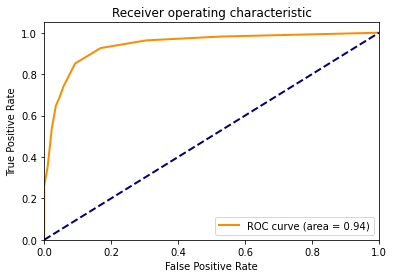

In [68]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# SAVING DATA

In [ ]:
# We save the data for future plotting of all hypotheses in one figure, for the paper

In [99]:
with open('../data_for_plotting/ABCDparent_Hyp1_y_true_df.npy', 'wb') as f:
    np.save(f, y_true_df)
with open('../data_for_plotting/ABCDparent_Hyp1_y_cbcl_df.npy', 'wb') as f:
    np.save(f, y_cbcl_df)

In [100]:
# Checking
with open('../data_for_plotting/ABCDparent_Hyp1_y_true_df.npy', 'rb') as f:
    my_true_df = np.load(f)
with open('../data_for_plotting/ABCDparent_Hyp1_y_cbcl_df.npy', 'rb') as f:
    my_cbcl_df = np.load(f)

In [101]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(my_true_df, my_cbcl_df)
roc_auc = auc(fpr, tpr)
roc_auc

0.9403101661332114

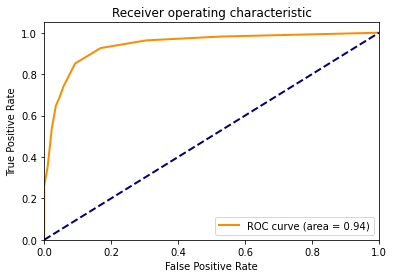

In [102]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

# Bootstrapping

In [ ]:
boot_ind = np.random.choice(range(len(y_true_df)), size=y_true_df.size, replace=True)
boot_truth = y_true_df[boot_ind]
boot_score = y_cbcl_df[boot_ind]

In [76]:
def gen_auc_boots(scores, truth, nboots=100, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    boot_res = []
    for pp in range(nboots):
        boot_ind = rng.choice(range(len(truth)), size=truth.size, replace=True)
        boot_truth = truth[boot_ind]
        boot_score = scores[boot_ind]
        boot_res.append(roc_auc_score(boot_truth, boot_score))
    return np.array(boot_res)

In [77]:
rng = np.random.default_rng()

target_auc = 0.8 # because we defined it this way. Change for Hyp 2b.

boots = gen_auc_boots(y_cbcl_df, y_true_df, nboots=1000, rng=rng)
boots = np.hstack([boots, np.array([sample_auc_score])])

In [82]:
boots

array([0.94347371, 0.96126736, 0.93233505, ..., 0.94177083, 0.95735651,
       0.94031017])

In [83]:
print (min(boots))

0.8705058398104659


# RESULTS

In [78]:
p_onesided = (boots >= target_auc).mean()

In [79]:
p_onesided

1.0

In [80]:
p_twosided1 = (boots > target_auc).mean()
p_twosided2 = (boots < target_auc).mean()
p_twosided = min(p_twosided1, p_twosided2)*2

In [81]:
p_twosided

0.0

In [ ]:
print(np.quantile(boots, .025))
print(np.quantile(boots, .975))
boots_mean_AUCROC = np.mean(boots)
print(boots_mean_AUCROC, '(', np.quantile(boots, .025), np.quantile(boots, .975), ')')

(array([  1.,   1.,   1.,   2.,   4.,   3.,   6.,  12.,  15.,  23.,  52.,
         36.,  56.,  90.,  80., 127., 107.,  79., 101.,  75.,  71.,  34.,
         18.,   5.,   2.]),
 array([0.87050584, 0.87500659, 0.87950735, 0.8840081 , 0.88850886,
        0.89300961, 0.89751036, 0.90201112, 0.90651187, 0.91101263,
        0.91551338, 0.92001413, 0.92451489, 0.92901564, 0.9335164 ,
        0.93801715, 0.9425179 , 0.94701866, 0.95151941, 0.95602017,
        0.96052092, 0.96502168, 0.96952243, 0.97402318, 0.97852394,
        0.98302469]),
 <BarContainer object of 25 artists>)

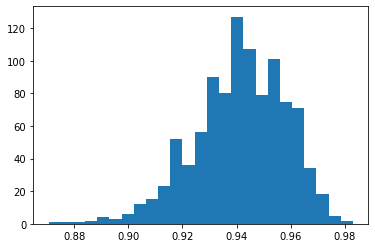

In [89]:
plt.hist(boots, bins=25)

##### All of the numbers in "boots" are over at least 0.85. 
##### We are comparing them with our 0.8

### Exploratory - flipping the p-value estimation direction

In [90]:
rng = np.random.default_rng()

target_auc = 0.8 # because we defined it this way. Change for Hyp 2b.

boots = gen_auc_boots(y_cbcl_df, y_true_df, nboots=1000, rng=rng)
boots = np.hstack([boots, np.array([sample_auc_score])])

p = (boots < target_auc).mean()

In [91]:
p

0.0

# --- Confusion matrices for optimal thresholds ---

In [92]:
conf_fpr, conf_tpr, conf_thresh = roc_curve(y_true, y_cbcl)
conf_thresh

array([88, 87, 84, 79, 78, 76, 75, 73, 70, 68, 66, 65, 63, 60, 56, 52, 50])

In [93]:
roc_auc = auc(conf_fpr, conf_tpr)
roc_auc

0.9403101661332114

In [94]:
def predict_y(cbcl, theshold):
    y_score = []
    for item in y_cbcl:
        if item >= threshold:
            y_score.append(1)
        else:
            y_score.append(0)
    return y_score

In [95]:
# Create a dataframe for all data for thresholds and associated fpr, tpr, tp, tn, fp, fn

# and also euclidian distance
# --> tpr - y axis 
# --> fpr - x axis 
# We want to calculate an Euclidian distance to (0,1) for each point on the ROC curve and pick the point where that is minimized. 

## dist = sqrt((x2 - x1)^2 + (y2 - y1)^2) 
## dist = sqrt(square(x2 - x1) + square(y2 - y1)) 

# I will create the df from a list of lists

# first initiate the lists

all_roc_auc = []
all_fpr = []
all_tpr = []
all_tn = []
all_fp = []
all_fn = []
all_tp = []
all_thresholds = []
all_euclidian = []

# Point to calculate the Euclidian distance with - (0, 1)
optimal_performance = np.array((0, 1))

# now iterate through thesholds, calculate the values of interest, update the lists

for threshold in range (51,90):
    # predict diagnoses with the given threshold
    y_score = predict_y(y_cbcl, threshold)
    # calculate fp, fn, tp, tn, aucroc
    tn, fp, fn, tp = confusion_matrix(y_true, y_score).ravel()
    fpr = fp/(fp+tn)
    tpr = tp/(tp+fn)
    # calculate euclidian
    fpr_tpr_datapoint = np.array((fpr, tpr))
    sum_sq = np.sum(np.square(optimal_performance - fpr_tpr_datapoint))
    euclidian = np.sqrt(sum_sq)
    
    # update all lists
    all_fpr.append(fpr)
    all_tpr.append(tpr)
    all_tn.append(tn)
    all_fp.append(fp)
    all_fn.append(fn)
    all_tp.append(tp)
    all_thresholds.append(threshold)
    all_euclidian.append(euclidian)


# make a dataframe out of lists

conf_matrices_data = pd.DataFrame(list(zip(all_thresholds, all_euclidian, all_fpr, all_tpr, all_tp, all_tn, all_fp, all_fn)),
               columns =['threshold', 'Euclidian', 'FPR', 'TPR', 'TP', 'TN', 'FP', 'FN'])

conf_matrices_data

,threshold,Euclidian,FPR,TPR,TP,TN,FP,FN
0,51,0.527074,0.526749,0.981481,53,230,256,1
1,52,0.527074,0.526749,0.981481,53,230,256,1
2,53,0.306771,0.304527,0.962963,52,338,148,2
3,54,0.306771,0.304527,0.962963,52,338,148,2
4,55,0.306771,0.304527,0.962963,52,338,148,2
5,56,0.306771,0.304527,0.962963,52,338,148,2
6,57,0.184268,0.168724,0.925926,50,404,82,4
7,58,0.184268,0.168724,0.925926,50,404,82,4
8,59,0.184268,0.168724,0.925926,50,404,82,4
9,60,0.184268,0.168724,0.925926,50,404,82,4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


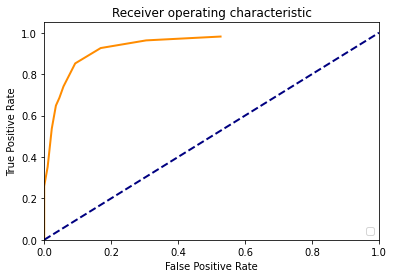

In [96]:
# Just to visualize

plt.figure()
lw = 2 # linewidt
plt.plot(
    all_fpr,
    all_tpr,
    color="darkorange",
    lw=lw,
    #label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [97]:
# Find the best fpr/tpr pair

# What is the min euclidian distance in the dataframe?
conf_matrices_data[['Euclidian']].idxmin()

Euclidian    10
dtype: int64

In [98]:
conf_matrices_data.loc[10]

threshold     61.000000
Euclidian      0.174703
FPR            0.092593
TPR            0.851852
TP            46.000000
TN           441.000000
FP            45.000000
FN             8.000000
Name: 10, dtype: float64